# <center><font color=softblue> THE REGRESSION PROJECT</center> 

-----------------------------------------------

## <center><font color=orange>LAPTOP PRICES PREDICTIONS</center>

<img src="https://nypost.com/wp-content/uploads/sites/2/2023/03/laptopbss.jpg?quality=75&strip=all" width="800">


This project aims to predict laptop prices based on various features using machine learning algorithms. The dataset contains information on different laptop models, their technical specifications, and corresponding prices. Before building the predictive models, feature engineering and correlation analysis will be performed. For the machine learning process, Linear Regression, Decision Tree, Random Forest, AdaBoost, and XGBoost algorithms will be applied, and their performance metrics will be compared to identify the most effective model.

### <font color=lightblue>DATA DICTIONARIES:

**Company:** Laptop's brand 

**TypeName:** The types of laptop. ("gaming laptop", "ultrabook", "notebook")

**ScreenResolution:** Screen resolution in pixels (for example 1920x1080).

**Inches:** Screen size in inch. 

**CPU:** Processor- It defines laptop speed and processing power. The brand of CPU (Intel, AMD) and the laptop model (i5, Ryzen 7) are located in this part.

**RAM:** Random Access Memory - The laptop's temporary memory capacity in GB such as 8GB, 16GB etc.
    
**Memory:** It represents the amount of storage available on the computer. 

**GPU:** Graffical Processing Unit - this column includes GPU's brand and model. 
    
**Opsys:** Operating System - The software in Laptops ( Windows, macOS, Linux etc.) 

**Weight:** Laptop weight in kg. It is important in terms of portability. 

**Price:** Laptop prices

### PACKAGES:

In [1]:
import pandas as pd
import miceforest as mf
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [309]:
df=pd.read_csv("laptop_data.csv") # Data Importing

### EDA - Explatory Data Analysis

In [310]:
df.head() # The first 5 observations in the data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [311]:
df.info() # variable types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [312]:
df.isnull().sum() # Is there any missing value?

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

**Any missing value is not available in the data**

In [313]:
df.shape # Data size 

(1303, 12)

### DATA ENGINEERING

Missing Cpu values will be filled by using Imputation Kernel method. In order to do this, object variables should be changed to categorical variables.

In [314]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        1303 non-null   int64   
 1   Company           1303 non-null   category
 2   TypeName          1303 non-null   category
 3   Inches            1303 non-null   float64 
 4   ScreenResolution  1303 non-null   category
 5   Cpu               1303 non-null   category
 6   Ram               1303 non-null   category
 7   Memory            1303 non-null   category
 8   Gpu               1303 non-null   category
 9   OpSys             1303 non-null   category
 10  Weight            1303 non-null   category
 11  Price             1303 non-null   float64 
dtypes: category(9), float64(2), int64(1)
memory usage: 63.1 KB


**This operation extracts the processor speed from the Cpu column and converts it into a float value:**

In [316]:
df['Cpu'] = df['Cpu'].str.extract('(\d+\.\d+)').astype(float)



<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_13116\3021270996.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Cpu'] = df['Cpu'].str.extract('(\d+\.\d+)').astype(float)


**Fill the missing Cpu observations with Imputation Kernol method:**

In [317]:
imp = mf.ImputationKernel(df)
df=imp.complete_data() 

In [318]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

**Rename the Unnamed column as ID:**

In [319]:
df = df.rename(columns={'Unnamed: 0': 'Id'})


In [320]:
df.columns

Index(['Id', 'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [321]:
data.shape

(1303, 15)

**This operation categorizes each ScreenResolution value into IPS&Touchscreen, IPS, Touchscreen, or Other based on the keywords it contains:**

In [322]:
df['screen_type'] = df['ScreenResolution'].apply(
    lambda x: 'IPS&Touchscreen' if 'IPS' in x and 'Touchscreen' in x else
              'IPS' if 'IPS' in x else 
              'Touchscreen' if 'Touchscreen' in x else 
              'Other'
)

In [323]:
df = df.rename(columns={'screen_type': 'ScreenType'})


In [324]:
df.sample(20)

,Id,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenType
360,360,HP,Notebook,15.6,1366x768,2.30,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.86kg,23389.9200,Other
1151,1151,HP,Notebook,15.6,1366x768,1.80,4GB,500GB HDD,AMD Radeon R2 Graphics,Windows 10,1.86kg,15824.1600,Other
924,924,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,2.50,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.37kg,97236.0000,IPS&Touchscreen
985,985,Dell,Notebook,15.6,1366x768,2.50,4GB,500GB HDD,AMD Radeon R5 M430,Windows 10,2.25kg,31914.7200,Other
941,941,Asus,Notebook,17.3,1600x900,1.60,4GB,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.8kg,28238.4000,Other
322,322,Asus,Notebook,14.0,Full HD 1920x1080,2.70,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2kg,58288.3200,Other
754,754,Asus,Notebook,15.6,1366x768,2.70,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.37kg,45282.6720,Other
713,713,Asus,Notebook,14.0,Full HD 1920x1080,1.10,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,15877.4400,Other
553,553,HP,Notebook,17.3,1600x900,2.60,8GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.65kg,28992.3120,Other
177,177,MSI,Gaming,18.4,Full HD 1920x1080,2.90,32GB,512GB SSD + 1TB HDD,Nvidia GTX 980 SLI,Windows 10,4.4kg,149130.7200,Other


**This operation extracts the screen resolution dimensions, converts them to integers, and computes the total number of pixels:**

In [325]:
df["ScreenResolutionPixels"] = df["ScreenResolution"].str.extract(r'(\d+)x(\d+)').astype(int).prod(axis=1)


In [326]:
df.head()

,Id,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenType,ScreenResolutionPixels
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,IPS,4096000
1,1,Apple,Ultrabook,13.3,1440x900,1.8,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Other,1296000
2,2,HP,Notebook,15.6,Full HD 1920x1080,2.5,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Other,2073600
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,2.7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,IPS,5184000
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,3.1,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,IPS,4096000


**This operation removes the ‘kg’ text from the Weight column and converts the remaining values to float:**


In [327]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)


**This operation removes the ‘GB’ text from the Weight column and converts the remaining values to integer:**


In [328]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)


In [329]:
df.head()

,Id,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenType,ScreenResolutionPixels
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,IPS,4096000
1,1,Apple,Ultrabook,13.3,1440x900,1.8,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Other,1296000
2,2,HP,Notebook,15.6,Full HD 1920x1080,2.5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Other,2073600
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,2.7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,IPS,5184000
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,3.1,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,IPS,4096000


**This operation identifies whether the memory unit is TB or GB and then extracts the numerical value, converting TB values into GB:**


In [330]:
df['memory_type'] = df['Memory'].str.contains('TB').map({True: 'TB', False: 'GB'})

In [331]:
df['memory_value'] = df.apply(
    lambda row: float(row['Memory'].split()[0].replace('GB', '').replace('TB', '').strip()) 
    if row['memory_type'] == 'GB' 
    else float(row['Memory'].split()[0].replace('GB', '').replace('TB', '').strip()) * 1024 
    if row['memory_type'] == 'TB' 
    else None, axis=1)


In [332]:
df.head()

,Id,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenType,ScreenResolutionPixels,memory_type,memory_value
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,IPS,4096000,GB,128.0
1,1,Apple,Ultrabook,13.3,1440x900,1.8,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Other,1296000,GB,128.0
2,2,HP,Notebook,15.6,Full HD 1920x1080,2.5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Other,2073600,GB,256.0
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,2.7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,IPS,5184000,GB,512.0
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,3.1,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,IPS,4096000,GB,256.0


**This operation drops the ScreenResolution, Memory, and memory_type columns from the dataframe. Because we son't use these columns.**

In [333]:
df=df.drop(["ScreenResolution", "Memory", "memory_type"], axis=1)

In [334]:
df = df.rename(columns={'memory_value': 'Memory'}) # Rename the column 


In [335]:
df.head() 

,Id,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,ScreenType,ScreenResolutionPixels,Memory
0,0,Apple,Ultrabook,13.3,2.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,IPS,4096000,128.0
1,1,Apple,Ultrabook,13.3,1.8,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Other,1296000,128.0
2,2,HP,Notebook,15.6,2.5,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Other,2073600,256.0
3,3,Apple,Ultrabook,15.4,2.7,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,IPS,5184000,512.0
4,4,Apple,Ultrabook,13.3,3.1,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,IPS,4096000,256.0


In [336]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Iris Graphics 550      1
Intel Iris Pro Graphics      1
Nvidia GTX 980 SLI           1
Nvidia GeForce 920           1
Nvidia Quadro M620M          1
Name: count, Length: 110, dtype: int64

In [337]:
df=df.drop(["Gpu"], axis=1)

### EDA For The Preprocessed Clean Data

In [338]:
df.shape # data size

(1303, 12)

In [339]:
df.info() # variable types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Id                      1303 non-null   int64   
 1   Company                 1303 non-null   category
 2   TypeName                1303 non-null   category
 3   Inches                  1303 non-null   float64 
 4   Cpu                     1303 non-null   float64 
 5   Ram                     1303 non-null   int32   
 6   OpSys                   1303 non-null   category
 7   Weight                  1303 non-null   float64 
 8   Price                   1303 non-null   float64 
 9   ScreenType              1303 non-null   object  
 10  ScreenResolutionPixels  1303 non-null   int32   
 11  Memory                  1303 non-null   float64 
dtypes: category(3), float64(5), int32(2), int64(1), object(1)
memory usage: 86.7+ KB


In [340]:
df.head() # the first 5 observations

,Id,Company,TypeName,Inches,Cpu,Ram,OpSys,Weight,Price,ScreenType,ScreenResolutionPixels,Memory
0,0,Apple,Ultrabook,13.3,2.3,8,macOS,1.37,71378.6832,IPS,4096000,128.0
1,1,Apple,Ultrabook,13.3,1.8,8,macOS,1.34,47895.5232,Other,1296000,128.0
2,2,HP,Notebook,15.6,2.5,8,No OS,1.86,30636.0000,Other,2073600,256.0
3,3,Apple,Ultrabook,15.4,2.7,16,macOS,1.83,135195.3360,IPS,5184000,512.0
4,4,Apple,Ultrabook,13.3,3.1,8,macOS,1.37,96095.8080,IPS,4096000,256.0


# CORRELATION ANALYSIS

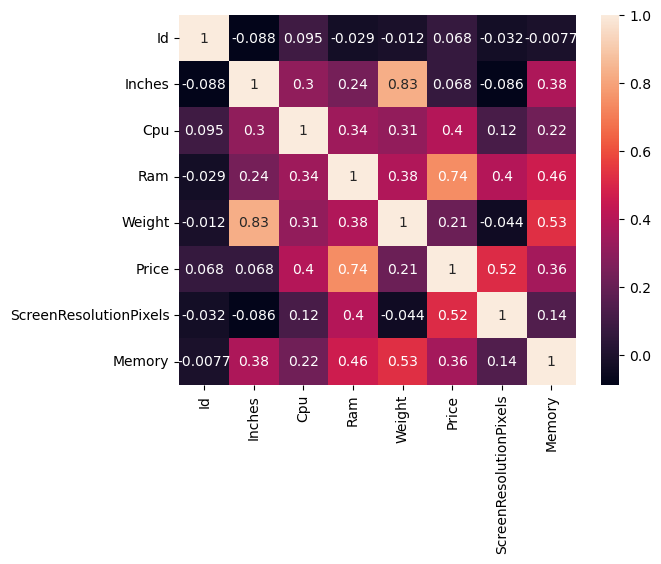

In [341]:
sns.heatmap(df.corr(numeric_only=True), annot=True); # heatmap for correlations between variables

**When we look at the correlation values between the target variable and independent variables, the correlation value between "Inches" and "Price" is smaller than 0.20.**

**The Hypothesis for t-test:**


**H0: "There is not a meaningful correlation between the "Price" and the "Inches" variables."**

**H1: "There is a meaningful correlation between the two variables.**



In [342]:
_,p=ttest_ind(df["Price"], df["Inches"])

In [343]:
p<0.05 # If p-value < 0.05, H0 is not accepted.

True

**Decision: the p-value is smaller than 0.05, so H0 is rejected. the variable of "Inches" should be included in the model.**

### x & y

In [344]:
x=df.drop(["Id", "Price"], axis=1) #the independent variables without "Id", "Price"
y= df["Price"] # The target variable

In [345]:
x=pd.get_dummies(x,drop_first=True) # Dummy Tranformation for Categorical Independent Variables

## Test & Train

In [346]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

# Test set is 20% of the data
# Train set is 80% of the data 
# randomly sampling by adding "random_state=42" argument

### MODELLING 

**LINEAR REGRESSION MODEL**

In [347]:
lr = LinearRegression() # Model
lr.fit(x_train, y_train) # Model training
tahmin1= lr.predict(x_test) # predictions for y_test

**DECISION TREE REGRESSION MODEL**

In [348]:
d =DecisionTreeRegressor() # Model
d.fit(x_train,y_train) # Model training
tahmin2=d.predict(x_test) # Predictions

**RANDOM FOREST REGRESSION MODEL**

In [349]:
rf=RandomForestRegressor() #Model

_GridSearchCV setting:_

In [350]:
param_grid = {
    'n_estimators': [50, 100, 200],  # The number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth
    'min_samples_split': [2, 5, 10],  # Minimum samples number required before being divined to nodes 
    'min_samples_leaf': [1, 2, 4],    # Minimum samples number in the leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # The number of the features used for trees 
    'bootstrap': [True, False]  # Will Bootstrap sampling be used?
}

# Find the best parameters of the model by using GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# The best parameters
print(f"En iyi parametreler: {grid_search.best_params_}")



Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
556 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ut

En iyi parametreler: {'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [351]:
# The best model according to the GridSearchCV result
best_rf = grid_search.best_estimator_

# Prediction with the test set
tahmin3 = best_rf.predict(x_test)


**XGB REGRESSION MODEL**

In [352]:
xgb = XGBRegressor() # Model

In [353]:
xgb.fit(x_train, y_train) # Model training (fitting)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [354]:
tahmin4=xgb.predict(x_test) # predictions

**ADA BOOST REGRESSION MODEL**

In [355]:
ada_boost = AdaBoostRegressor() # Model

# Model training
ada_boost.fit(x_train, y_train)

# Predictions with the test set
tahmin5 = ada_boost.predict(x_test)


In [356]:
r2_score(y_test, tahmin1) #R^2 score for the Linear Regression Model

0.738528304553336

In [357]:
r2_score(y_test, tahmin2) # R^2 score for the Decision Tree Model

0.6318902903582329

In [358]:
r2_score(y_test, tahmin3) # R^2 score for the Random Forest Model

0.8078297193455753

In [359]:
r2_score(y_test, tahmin4) # R^2 score for the XGBoost Model

0.7921026403271368

In [360]:
r2_score(y_test, tahmin5) # R^2 score for the AdaBoost Model 

0.6062481355038276

**The highest R^2 score belongs to the Random Forest Model** 

**MAE ve MSE scores for the Random Forest Model**

In [361]:
mean_absolute_error(y_test,tahmin3)

9828.368953333333

In [362]:
mean_squared_error(y_test, tahmin3)

277086616.63032925

### NORMALIZATION

In [363]:

normx= normalize(x)
normx=pd.DataFrame(normx, columns=[x.columns]) # The data normalized
x_train, x_test, y_train, y_test = train_test_split(normx,y, test_size=0.20, random_state=42)

In [364]:
lr = LinearRegression() # Linear Regression Modelling on the data normalized
lr.fit(x_train, y_train)
tahmin1= lr.predict(x_test)

In [365]:
d =DecisionTreeRegressor() # Decision Tree Regression Modelling on the data normalized
d.fit(x_train,y_train)
tahmin2=d.predict(x_test)

In [366]:
rf=RandomForestRegressor() # Random Forest Regression Modelling on the data normalized

param_grid = {
    'n_estimators': [50, 100, 200],  # Tree number 
    'max_depth': [None, 10, 20, 30],  # Max depth 
    'min_samples_split': [2, 5, 10],  # Minimum samples number required before being divined to nomb
    'min_samples_leaf': [1, 2, 4],    # Minimum samples number in the leaf nomb Yaprak düğümdeki minimum örnek sayısı
    'max_features': ['auto', 'sqrt', 'log2'],  #The number of the features used for the trees
    'bootstrap': [True, False]  # Will Bootstrap sampling be used?
}

# Find the best parameters of the model by using GridSearchCV 
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# The best parameters
print(f"En iyi parametreler: {grid_search.best_params_}")

# The best model in the result of GridSearchCV 
best_rf = grid_search.best_estimator_

# Predicting with the test set
tahmin3 = best_rf.predict(x_test)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
491 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ut

En iyi parametreler: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [367]:
xgb = XGBRegressor() # XGB Regression Model
xgb.fit(x_train, y_train) # model fitting
tahmin4=xgb.predict(x_test) # predictions 

In [368]:
ada_boost = AdaBoostRegressor() # Ada Boost Regression

# Model training
ada_boost.fit(x_train, y_train)

# Predictions
tahmin5 = ada_boost.predict(x_test)


In [369]:
r2_score(y_test, tahmin1) # R^2 score for the Lineer Regression Model with normalized data

0.5550188472073644

In [370]:
r2_score(y_test, tahmin2) # R^2 score for the Decision Tree Regression Model with normalized data

0.6759229874347188

In [371]:
r2_score(y_test, tahmin3) # R^2 score for the Random Forest Regression Model with normalized data

0.7901237832963827

In [372]:
r2_score(y_test, tahmin4) # R^2 score for the XGBoost Regression Model with normalized data

0.807396080732623

In [373]:
r2_score(y_test, tahmin5) # R^2 score for the AdaBoost Regression Model with normalized data

0.34665380564407133

**Normalization operation has not affected the model performance so much. Only R^2 score of the XGBoost model increased to 0.81 but this is not a big change.**

**MAE and RMSE scores of the XGBoost Model for The Normalized Data:**

In [374]:
mean_absolute_error(y_test, tahmin4) # MAE

10805.921500939894

In [375]:
mean_squared_error(y_test, tahmin4)**0.5 # RMSE

16664.68936920963

### The Scatter Plot of XGBoost Model Predictions and True Values For The Normalized Data:

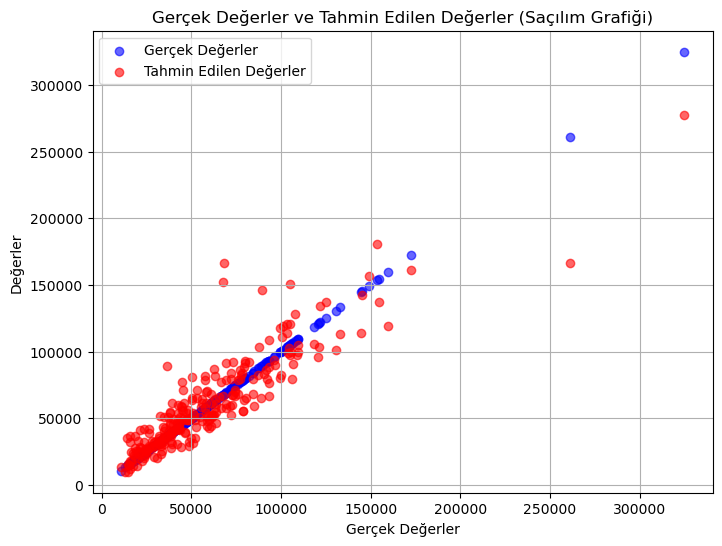

In [376]:
plt.figure(figsize=(8,6))

# Scatter Plot for the true values
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label='Gerçek Değerler')

# Scatter Plot for the predictions 
plt.scatter(y_test, tahmin4, color='red', alpha=0.6, label='Tahmin Edilen Değerler')

# Title and labels 
plt.title('Gerçek Değerler ve Tahmin Edilen Değerler (Saçılım Grafiği)')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Değerler')
plt.legend()
plt.grid(True)
plt.show()
